# SANJEEV DAS
## UnSupervised Learning 
### K-Means Clustering 

On Iris DataSet
---
Importinf required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
target_names = pd.DataFrame(iris.target,columns=["target"])
data=iris_df.join(target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Ploting DataSet With Given Targets


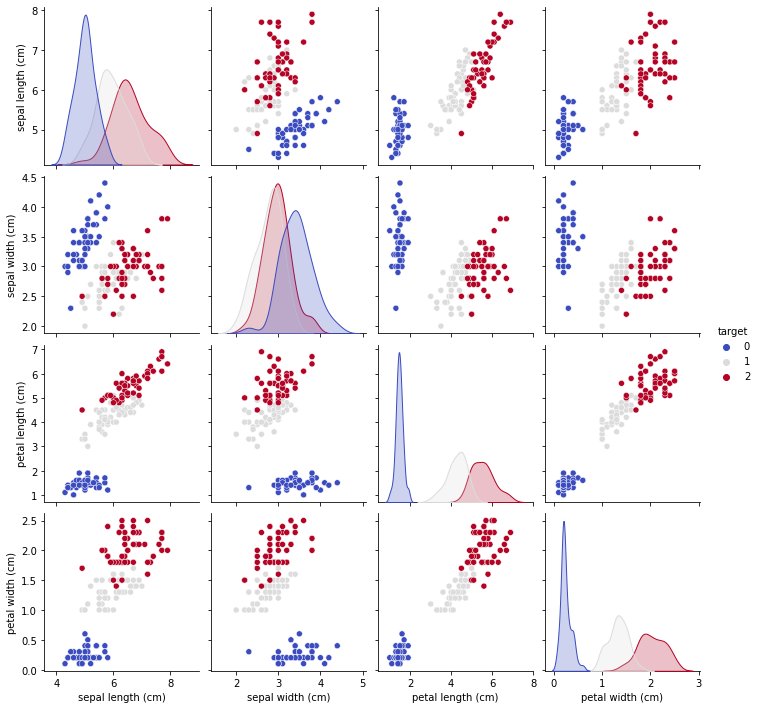

In [ ]:
sns.pairplot(data,hue="target",palette="coolwarm")
plt.show()

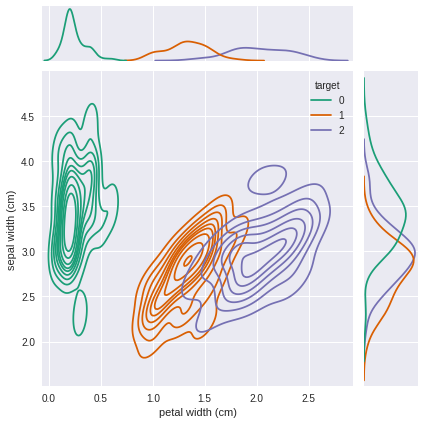

In [ ]:
plt.style.use("seaborn")
sns.jointplot(x="petal width (cm)",y="sepal width (cm)",data=data,kind="kde",hue = data.target,palette="Dark2")

## Pre - Processing of Data 

In [ ]:
from sklearn.preprocessing import StandardScaler

X = data.iloc[:,:-1].values
#scaler = StandardScaler()
#transformed_values = scaler.fit_transform(X)


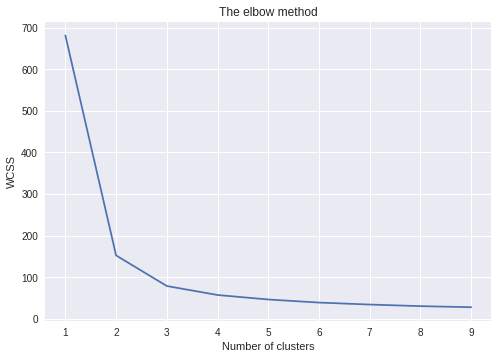

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  knn=KMeans(i)
  knn.fit(X)
  wcss.append(knn.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

## Using the elbow method it was found 3 is the optimal value  

In [ ]:
knn = KMeans(3)
pred_y = knn.fit_predict(X)

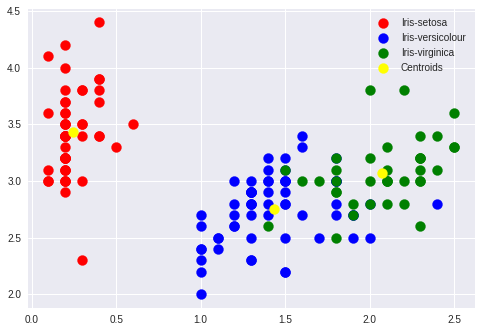

In [ ]:
plt.scatter(X[pred_y == 0, 3], X[pred_y == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[pred_y == 1, 3], X[pred_y == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[pred_y == 2, 3], X[pred_y == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(knn.cluster_centers_[:, 3], knn.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()